## Documentación del paquete: **gestdata**


En este documento se presentan las funcionalidades que ofrece el paquete **gestdata**. Aparte de contener explicaciones de cada función y clase que se implementa en la librería, contiene bloques de código que ayudan a entender el correcto uso del paquete **gestdata**.

### Importación de los ficheros necesarios

Por supuesto, para poder ejecutar las celdas de este documento se necesitan importar todas las funciones y definiciones de **gestdata**.

In [3]:
from gestdata import *

### Inicialización de los datos

A lo largo de este documento se mostrarán ejecuciones de distintas funciones del paquete **gestdata**. Por tanto, se requieren datos sobre los cuales hacer las ejecuciones. En esta sección se inicializan varios tipos de estructuras de datos que se emplearán a lo largo del documento.

In [4]:
# Preparamos un numpy.array numérico a
a = np.array([3.5,7.4,1.2,2.0,3.9,5.3,6.1,6.9])

# Preparamos un objeto pandas.Series s que contenga números
s = pd.Series([7.6,2.2,2.4,1.3,6.4,9.9])

# Preparamos un pandas.DataFrame df con los datos de 5 personas
Name = ("Jon", "Bill", "Maria", "Ben", "Tina")
Age = (23, 41, 32, 58, 26)
Weight = (61,98,75,112,74)
Height = (1.75,1.68,1.56,1.86,1.76)
Hair = ("Long", "Short","Long", "Short","Long")
Independent = (True, False, True, True, False)

df = pd.DataFrame({"Name":Name, "Age":Age, "Weight":Weight, "Height":Height, "Hair":Hair, "Independent":Independent})

### Normalización y estandarización (stannorm.py)

En esta sección se analizan las funciones de normalización y estandarización que ofrece el paquete **gestdata**. La implementación de dichas funciones se encuentra en el fichero "stannorm.py".

#### Normalización

La librería **gestdata** ofrece una única función para normalizar los datos numéricos de un *numpy.array*, un *pandas.Series* o un *pandas.DataFrame*, de tal modo que el valor mínimo sea 0 y el máximo 1. En el caso del dataframe, esto se hace para cada columna. La función para esta tarea se llama ***normalize***, y sólo recibe una entrada: los estructura de datos a normalizar. Veamos unos ejemplos de ejecución:

In [5]:
# Normalizar un np.array
normalized = normalize(a)
print("np.array original:", a)
print("np.array normalizado:", normalized)
print()

# Normalizar un objeto pd.Series
normalized = normalize(s)
print("pd.Series original:", np.array(s))
print("pd.Series normalizado:", np.array(normalized))
print()


# Normalizar un pd.DataFrame
normalized = normalize(df)
print("pd.DataFrame original:\n", df)
print()
print("pd.DataFrame normalizado:\n", normalized)

# Que ocurre si le pasamos un vector no numérico?
try:
    normalize(np.array("abc"))
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
np.array normalizado: [0.37096774 1.         0.         0.12903226 0.43548387 0.66129032
 0.79032258 0.91935484]

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
pd.Series normalizado: [0.73255814 0.10465116 0.12790698 0.         0.59302326 1.        ]

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

pd.DataFrame normalizado:
     Name       Age    Weight    Height   Hair  Independent
0    Jon  0.000000  0.000000  0.633333   Long         True
1   Bill  0.514286  0.725490  0.400000  Short        False
2  Maria  0.257143  0.274510  0.000000   Long         True
3    Ben  1.000000  1.000000  1.000000  Short         True
4   Tina  0.085714  0.254902  0.666667   Long   

#### Estandarización

Igual que en el caso anterior, el paquete ofrece una única funcion para estandarizar: ***standarize***. El funcionamiento es el mismo, sólo que esta vez como resultado obtenemos vectores estandarizados, es decir, de media 0 y de varianza 1. A continuación se muestran algunos ejemplos:

In [6]:
# Estandarizar un np.array
standarized = standarize(a)
print("np.array original:", a)
print("np.array estandarizado:", standarized)
print()

# Estandarizar un objeto pd.Series
standarized = standarize(s)
print("pd.Series original:", np.array(s))
print("pd.Series estandarizado:", np.array(standarized))
print()


# Estandarizar un pd.DataFrame
standarized = standarize(df)
print("pd.DataFrame original:\n", df)
print()
print("pd.DataFrame estandarizado:\n", standarized)

# Que ocurre si le pasamos un vector no numérico?
try:
    standarize(np.array("abc"))
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
np.array estandarizado: [-0.49004451  1.35205051 -1.57640823 -1.19854259 -0.30111169  0.36015319
  0.73801884  1.11588448]

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
pd.Series estandarizado: [ 0.82578898 -0.86760109 -0.80488293 -1.14983276  0.44948008  1.54704772]

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

pd.DataFrame estandarizado:
     Name       Age    Weight    Height   Hair  Independent
0    Jon -1.031616 -1.251035  0.282038   Long         True
1   Bill  0.396775  0.761500 -0.423057  Short        False
2  Maria -0.317420 -0.489535 -1.631792   Long         True
3    Ben  1.745812  1.522999  1.390045  Short         True
4   Tina -0.793551 -0.543928

### Métricas (metrics.py)

En esta sección se muestran las funciones que se encuentran en el fichero "metrics.py", las cuales sirven para calcular diversas métricas y hacer algunas operaciones dependiendo de estas.

#### Varianza

El paquete **gestdata** ofrece la oportunidad de calcular la varianza de los datos númericos de un *numpy.array*, un *pandas.Series* o un *pandas.DataFrame*, gracias a la función ***varianza***. Esta función sólo necesita recibir los datos como parámetro para actuar. Veamos algunos ejemplos:

In [7]:
# Varianza de un np.array
vari = varianza(a)
print("np.array original:", a)
print("Varianza del vector:", vari)
print()

# Varianza de un objeto pd.Series
vari = varianza(s)
print("pd.Series original:", np.array(s))
print("Varianza del vector:", vari)
print()


# Varianzas de las columnas numéricas de un pd.DataFrame
vari = varianza(df)
print("pd.DataFrame original:\n", df)
print()
print("Varianzas del dataframe :\n", vari)

# Que ocurre si le pasamos un vector no numérico?
try:
    varianza(np.array("abc"))
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
Varianza del vector: 5.122678571428572

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
Varianza del vector: 12.202666666666667

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Varianzas del dataframe :
 Age       198.50000
Weight    422.50000
Height      0.01232
dtype: float64

Error:
x tiene que ser un vector numérico


#### Entropía

Además de la varianza, permite calcular otra métrica: la entropía. Esta métrica se suele utilizar para variables categóricas, pero el paquete **gestdata** también admite tratar variables numéricas como si fueran categóricas. El calculo de la entropía se hace mediante el método ***entropy***, y el funcionamiento es exactamente el mismo que el de la varianza.

In [8]:
# Entropía de un np.array
entrpy = entropy(a)
print("np.array original:", a)
print("Entropía del vector:", entrpy)
print()

# Entropía de un objeto pd.Series
entrpy = entropy(s)
print("pd.Series original:", np.array(s))
print("Entropía del vector:", entrpy)
print()


# Entropías de todas las columnas de un pd.DataFrame
entrpy = entropy(df)
print("pd.DataFrame original:\n", df)
print()
print("Entropía del dataframe :\n", entrpy)

# Que ocurre si le pasamos un vector vacío?
try:
    entropy(np.array([]))
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
Entropía del vector: 3.0

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
Entropía del vector: 2.584962500721156

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Entropía del dataframe :
 Name           2.321928
Age            2.321928
Weight         2.321928
Height         2.321928
Hair           0.970951
Independent    0.970951
dtype: float64

Error:
Alguna dimensión de x es 0


#### ROC y AUC

Aparte de las métricas mencionadas, la librería **gestdata** ofrece funciones que sirven para manejar muestras de clasificación. Concretamente, implementa la función ***ROC***, el cual calcula y visualiza el gráfico ROC que se obtiene al hacer la clasificación con distintos límites de decisión. Para esto, necesita 3 parámetros: un *pd.DataFrame* que contenga los datos, el nombre de la variable atributo en el dataframe (el que se utiliza para clasificar), y el nombre de la variable objetivo que se quiere predecir. Estos nombres tienen que estar presentes en el dataframe como columnas. Además, los atributos tienen que ser numéricos, y la variable objetivo binaria. Si esto fuera poco. también ofrece una función llamada ***AUC*** que sirve para calcular el *Area Under the Curve*, es decir, el área que hay debajo de la curva ROC. Por lo tanto, las 2 funciones son complementarias, y el segundo necesita del output del primero. Veámoslo con algunos ejemplos:

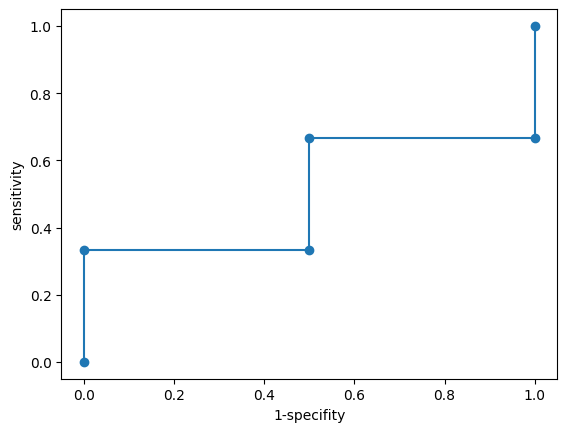

Coordenadas de los puntos de ROC:
      x         y
0  1.0  1.000000
1  1.0  0.666667
2  0.5  0.666667
3  0.5  0.333333
4  0.0  0.333333
5  0.0  0.000000

Area bajo la curva ROC: 0.5

Error:
La variable objetivo no es de tipo binario


In [9]:
# Ejecutamos ROC sobre el dataframe df, utilizando la variable "Age" como predictor e 
# "Independent" como objetivo. La función nos devuelve las coordenadas de los puntos de ROC
roc_coords = ROC(df,attribute_variable="Age",predict_variable="Independent")
print("Coordenadas de los puntos de ROC:\n", roc_coords)
print()

# Después, para calcular el área, le pasamos el dataframe de coordenadas del ROC a la función AUC. 
area = AUC(roc_coords)
print("Area bajo la curva ROC:", area)

# Que ocurre, por ejemplo, si la variable objetivo especificada no es binaria?
try:
    roc_coords = ROC(df,attribute_variable="Age",predict_variable="Weight")
except Exception as e:
    print("\nError:")
    print(e)

#### Todo en uno

Viendo todas las funciones que hay para calcular métricas, **gestdata** ofrece un método que combina todas en una, la denominada ***metricas***. Esta función, dado un *pd.DataFrame* de datos, calcula todas las métricas dependiendo del tipo de variable: varianza para las columnas numéricas, entropía para las categóricas, y tambíen tanto la curva ROC como el valor AUC si se especifican una variable predictora y una objetivo. A continuación se presentan unos ejemplos de ejecución:

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Varianza/Entropía de las variables del dataframe:
        Name    Age  Weight   Height      Hair  Independent
0  2.321928  198.5   422.5  0.01232  0.970951     0.970951

Entropía, varianza, ROC y AUC del dataframe:



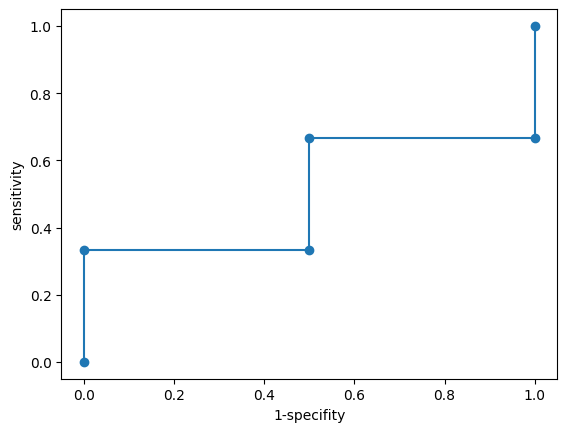

,Name,Age,Weight,Height,Hair,Independent
0,2.321928,198.5,422.5,0.01232,0.970951,0.970951


In [10]:
# Calculamos las métricas básicas del dataframe: Varianza para las variables numéricas del dataframe y entropía para las categóricas
m = metricas(df)
print("pd.DataFrame original:\n", df)
print()
print("Varianza/Entropía de las variables del dataframe:\n", m)
print()
# Además, si se especifican una variable atributo y una objetivo, visualiza el ROC y calcula el AUC
print("Entropía, varianza, ROC y AUC del dataframe:\n")
metricas(df, attribute_variable="Age",predict_variable="Independent")


#### Filtrado de variables en base a las métricas

Si esto fuera poco, la librería contiene una función que sirve para filtrar las variables de un *pd.DataFrame* en base a los valores de las métricas básicas (entropía y varianza). Concretamente, la función se llama ***filtrar***, y permite al usuario quitar algunas variables por medio de la condición que quiera, ya que recibe la condición como parámetro de tipo *string*. Además, gracias a 2 parámetros adicionales, permite ajustar el tipo de métrica que se quiere utilizar para filtrar. Todo esto se ve más claro con los siguientes ejemplos: 

In [11]:
print("Métricas del dataframe:\n",metricas(df),"\n")

# Utilizamos la varianza para filtrar. Por ello, sólo se filtrarán columnas numéricas.
# Se quitarán las variables numéricas que no tengan una varianza mayor a 200
filtered = filtrar(df,condition=">200", use_varianza=True, use_entropy=False)
print("Dataframe filtrado en base a la condición varianza>200 (las categóricas no resultan afectadas):")
print(filtered)
print()

# Utilizamos la entropía para filtrar. En este caso, la entropía se calcula para 
# las columnas categóricas, por lo que las numéricas no se verán afectadas.
# Se quitarán las variables categóricas que no tengan una entropía menor o igual a 1
filtered = filtrar(df,condition="<=1", use_varianza=False, use_entropy=True)
print("Dataframe filtrado en base a la condición entropía<=1 (las numéricas no resultan afectadas):")
print(filtered)

Métricas del dataframe:
        Name    Age  Weight   Height      Hair  Independent
0  2.321928  198.5   422.5  0.01232  0.970951     0.970951 

Dataframe filtrado en base a la condición varianza>200 (las categóricas no resultan afectadas):
    Name  Weight   Hair  Independent
0    Jon      61   Long         True
1   Bill      98  Short        False
2  Maria      75   Long         True
3    Ben     112  Short         True
4   Tina      74   Long        False

Dataframe filtrado en base a la condición entropía<=1 (las numéricas no resultan afectadas):
   Age  Weight  Height   Hair  Independent
0   23      61    1.75   Long         True
1   41      98    1.68  Short        False
2   32      75    1.56   Long         True
3   58     112    1.86  Short         True
4   26      74    1.76   Long        False


De hecho, la función ***filtrar*** admite condiciones mucho más complejas. Por ejemplo, se puede utilizar el keyword "*in*" para ver si la métrica está dentro de una estructura definida por el usuario. Si eso fuera poco, se puede utilizar el keyword "*elem*" para reemplazar el valor de la métrica, y así, crear condiciones más largas y elaboradas. Las posibilidades son infinitas. Aquí se muestran 2 ejemplos: 

In [12]:
print("Métricas del dataframe:\n",metricas(df),"\n")

# En este caso, utilizamos todas las métricas para filtrar (varianza para las numéricas y
# entropía para las categóricas). La condición en este caso es un poco mas complicada:
# que el valor de la métrica se encuentre en una lista definida.
filtered = filtrar(df,condition="in [198.5,0.9709505944546686]", use_varianza=True, use_entropy=True)
print("Dataframe filtrado en base a la condición métrica in [198.5,0.9709505944546686] :")
print(filtered)
print()

# Por último, se pueden crear condiciones aún más complejas utilizando el keyword "elem"
# en la condición, como sustitución del valor de la métrica. Por ejemplo, podemos
# pedir que el valor de la métrica sea igual a 422.5, o que esté entre 2 y 3:
filtered = filtrar(df,condition="==422.5 or (elem<3 and elem>2)", use_varianza=True, use_entropy=True)
print("Dataframe filtrado en base a la condición métrica==422.5 or (métrica<3 and métrica>2) :")
print(filtered)

Métricas del dataframe:
        Name    Age  Weight   Height      Hair  Independent
0  2.321928  198.5   422.5  0.01232  0.970951     0.970951 

Dataframe filtrado en base a la condición métrica in [198.5,0.9709505944546686] :
   Age   Hair  Independent
0   23   Long         True
1   41  Short        False
2   32   Long         True
3   58  Short         True
4   26   Long        False

Dataframe filtrado en base a la condición métrica==422.5 or (métrica<3 and métrica>2) :
    Name  Weight
0    Jon      61
1   Bill      98
2  Maria      75
3    Ben     112
4   Tina      74


### Correlación e información mutua (correlmutua.py)

En esta sección se explican las funciones que se encuentran en el fichero "correlmutua.py", las cuales sirven para calcular la correlación y la información mutua entre las variables de un dataframe. Además, el paquete ofrece la posibilidad de visualizar la matriz de relaciones que contiene estos valores.

#### Correlación

El paquete **gestdata** implementa la funcion ***correlacion***, que se puede utilizar para calcular las correlaciones entre todos los pares de variables numéricas de un *pd.DataFrame*. Concretamente, calcula los coeficientes de correlación de Pearson.

In [13]:
print("pd.DataFrame original:\n", df)
print()

# Calculamos un coeficiente de correlación de Pearson para cada par de variables numéricas
corr = correlacion(df)

print("Coeficientes de correlación de Pearson entre las variables numéricas:\n", corr)

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Coeficientes de correlación de Pearson entre las variables numéricas:
    Age-Weight  Age-Height  Weight-Height
0    0.967725    0.436432       0.406532


#### Información mutua

Ya que la correlación solo sirve para variables numéricas, el paquete **gestdata** ofrece otra función que mide la relación entre variables categóricas: ***mutual_information***. Este calcula la información mutua entre todas las variables de un *pd.DataFrame*. El funcionamiento es el mismo que el de la correlación. Además, tiene un parámetro para definir si sólo se quiere calcular sobre las variables categóricas. Si se quiere calcular la información mutua entre 2 vectores, se puede utilizar el método ***mutual_information_vectors***.

In [14]:
print("pd.DataFrame original:\n", df)
print()

# Calculamos la información mutua entre todas las variables del dataframe
mutinfo = mutual_information(df)

print("Información mutua de cada par de variables\n", mutinfo)
print()

# Calculamos la información mutua entre las variables categóricas del dataframe
mutinfo = mutual_information(df, only_categorical=True)

print("Información mutua de cada par de variables categóricas\n", mutinfo)

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Información mutua de cada par de variables
    Name-Age  Name-Weight  Name-Height  Name-Hair  Name-Independent  \
0  2.321928     2.321928     2.321928   0.970951          0.970951   

   Age-Weight  Age-Height  Age-Hair  Age-Independent  Weight-Height  \
0    2.321928    2.321928  0.970951         0.970951       2.321928   

   Weight-Hair  Weight-Independent  Height-Hair  Height-Independent  \
0     0.970951            0.970951     0.970951            0.970951   

   Hair-Independent  
0          0.019973  

Información mutua de cada par de variables categóricas
    Name-Hair  Name-Independent  Hair-Independent
0   0.970951          0.970951          0.019973


In [15]:
# Informacion mutua entre 2 vectores
mutinfo = mutual_information_vectors(df["Name"],df["Hair"])

print("Información mutua entre las variables 'Name' y 'Hair':", mutinfo)

Información mutua entre las variables 'Name' y 'Hair': 0.9709505944546684


#### Todo en uno

Debido a que las funciones del fichero "correlmutua.py" calculan la relación entre las variables de un dataframe, se puede construir una matriz de relaciones con todos los valores. De hecho, el método ***mutual_correlation*** hace justamente eso. Calcula la correlacion para todos los pares de variables numéricas, la información mutua para las categóricas, y ajusta todos los valores en una matriz (*pd.Dataframe*). Los valores de la diagonal serán 1 en el caso de las númericas, y su entropía en el de las categóricas. Los demás serán *NaN*. Veamos un ejemplo:

In [16]:
print("pd.DataFrame original:\n", df)
print()

# Calculamos la matriz de correlacion/información mutua entre todas las variables del dataframe
mutcorr = mutual_correlation(df)

print("Matriz de relaciones de la variables\n", mutcorr)
print()

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Matriz de relaciones de la variables
                  Name       Age    Weight    Height      Hair  Independent
Name         2.321928       NaN       NaN       NaN  0.970951     0.970951
Age               NaN  1.000000  0.967725  0.436432       NaN          NaN
Weight            NaN  0.967725  1.000000  0.406532       NaN          NaN
Height            NaN  0.436432  0.406532  1.000000       NaN          NaN
Hair         0.970951       NaN       NaN       NaN  0.970951     0.019973
Independent  0.970951       NaN       NaN       NaN  0.019973     0.970951



Además, el paquete **gestdata** trae otra función llamada ***corr_plot***, el cual sirve para hacer un gráfico de tipo heatmap de un dataframe. Está pensado para ser utilizado sobre la matriz de relaciones, pero se puede utilizar en cualquier otra situación. Veamos el resultado que obtiene sobre la matriz de relaciones calculada anteriormente:

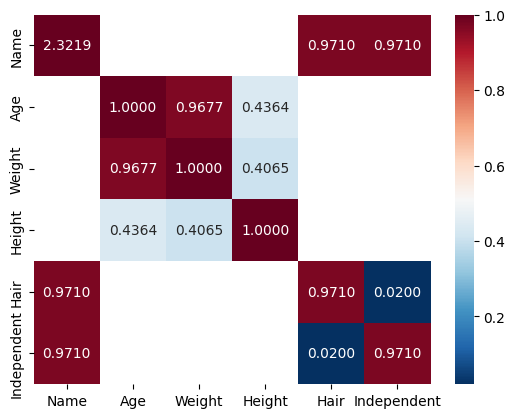

In [17]:
# Visualizar la matriz de relaciones por medio de un heatmap
corr_plot(mutcorr)

### Discretización (discretization.py)

En esta sección se muestran los métodos que están implementados en el fichero "discretization.py". Estas funciones sirven para discretizar valores númericos, en base a distintos criterios.

#### Discretización genérica

La discretización más genérica posible consiste en separar los datos en intérvalos definidos por el usuario. Estos intérvalos se definen gracias a los puntos de corte. **gestdata** ofrece una función llamada ***discretize*** para esta tarea. Como parámetros necesita recibir un vector numérico y los puntos de corte definidos en una lista. En cuanto al output, devolverá un objeto de tipo **pandas.core.arrays.categorical.Categorical** que contenga los datos discretizados en intérvalos, y la definición de los intérvalos que se han utilizado como categorías. A continuación se muestran unas ejecuciones:

In [18]:
# Discretizar un np.array numérico en 3 intérvalos definidos por los puntos de corte [1,5]
discretized = discretize(a,[1,5])
print("np.array original:", a)
print("np.array discretizado:\n", discretized)
print()

# Discretizar un pd.Series numérico en 5 intérvalos definidos por los puntos de corte [-1,2.2,6.7,10]
discretized = discretize(s, [-1,2.2,6.7,10])
print("pd.Series original:", np.array(s))
print("pd.Series discretizado:\n", discretized)

# Que ocurre si le pasamos un pd.DataFrame?
try:
    discretize(df,[1,3,4])
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
np.array discretizado:
 [(1.0, 5.0], (5.0, inf], (1.0, 5.0], (1.0, 5.0], (1.0, 5.0], (5.0, inf], (5.0, inf], (5.0, inf]]
Categories (3, interval[float64, right]): [(-inf, 1.0] < (1.0, 5.0] < (5.0, inf]]

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
pd.Series discretizado:
 0    (6.7, 10.0]
1    (-1.0, 2.2]
2     (2.2, 6.7]
3    (-1.0, 2.2]
4     (2.2, 6.7]
5    (6.7, 10.0]
dtype: category
Categories (5, interval[float64, right]): [(-inf, -1.0] < (-1.0, 2.2] < (2.2, 6.7] < (6.7, 10.0] < (10.0, inf]]

Error:
Input array must be 1 dimensional


#### Discretización de igual anchura (Equal-width binning)

Un criterio para discretizar los datos puede ser la anchura de los intérvalos. En concreto, **gestdata** ofrece una función denominada ***discretizeEW*** que discretiza los valores numéricos en *num_bins* intérvalos de misma anchura (lo que se conoce como equal-width binning). Puede utilizarse con un *np.array*, un objeto *pd.Series* o un *pd.DataFrame*. Cuando la entrada es un vector, devuelve un objeto tipo *pandas.core.arrays.categorical.Categorical*, el cual contiene los valores discretizados en intérvalos, y los intérvalos que se han utilizado como categorías. En el caso del dataframe, devuelve un *pd.DataFrame* con las columnas númericas discretizadas, cada uno por su cuenta. Se verá más claro con unos ejemplos:

In [19]:
# Discretizar un np.array numérico en 3 intérvalos de igual anchura
discretized = discretizeEW(a,num_bins=3)
print("np.array original:", a)
print("np.array discretizado:\n", discretized)
print()

# Discretizar un pd.Series numérico en 2 intérvalos de igual anchura
discretized = discretizeEW(s, num_bins=2)
print("pd.Series original:", np.array(s))
print("pd.Series discretizado:\n", discretized)

# Que ocurre si le pasamos un vector no numérico?
try:
    discretizeEW(np.array("abc"),3)
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
np.array discretizado:
 [(3.267, 5.333], (5.333, inf], (-inf, 3.267], (-inf, 3.267], (3.267, 5.333], (3.267, 5.333], (5.333, inf], (5.333, inf]]
Categories (3, interval[float64, right]): [(-inf, 3.267] < (3.267, 5.333] < (5.333, inf]]

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
pd.Series discretizado:
 0     (5.6, inf]
1    (-inf, 5.6]
2    (-inf, 5.6]
3    (-inf, 5.6]
4     (5.6, inf]
5     (5.6, inf]
dtype: category
Categories (2, interval[float64, right]): [(-inf, 5.6] < (5.6, inf]]

Error:
Los valores tienen que ser numéricos


In [20]:
# Discretizar las columnas numéricas de un dataframe en 4 intérvalos de igual anchura
discretized = discretizeEW(df,num_bins=4)
print("pd.DataFrame original:\n", df)
print()
print("pd.DataFrame discretizado:\n", discretized)

# Que ocurre si le pasamos un num_bins incorrecto?
try:
    discretizeEW(df,0)
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pasamos una entrada de otro tipo?
try:
    discretizeEW("abc",3)
except Exception as e:
    print("\nError:")
    print(e)

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

pd.DataFrame discretizado:
     Name            Age         Weight         Height   Hair  Independent
0    Jon  (-inf, 31.75]  (-inf, 73.75]  (1.71, 1.785]   Long         True
1   Bill  (40.5, 49.25]  (86.5, 99.25]  (1.635, 1.71]  Short        False
2  Maria  (31.75, 40.5]  (73.75, 86.5]  (-inf, 1.635]   Long         True
3    Ben   (49.25, inf]   (99.25, inf]   (1.785, inf]  Short         True
4   Tina  (-inf, 31.75]  (73.75, 86.5]  (1.71, 1.785]   Long        False

Error:
El parámetro num_bins tiene que ser mayor que 0

Error:
x tiene que ser un np.array, un pd.Series o un pd.DataFrame


#### Discretización de igual frecuencia (Equal-frequency binning)

Otro criterio para discretizar los datos puede ser la frecuencia de los datos en cada intérvalo. Un algoritmo popular es la discretización de igual frecuencia (equal-frequency binning), que discretiza los valores tal que en cada intérvalo haya la misma cantidad de datos (puede haber una variación de 1). Esta función está implementada en **gestdata**, con el nombre de ***discretizeEF***. La manera de utilizarla es idéntica a la anterior.

In [21]:
# Discretizar un np.array numérico en 3 intérvalos con la misma frecuencia de datos
discretized = discretizeEF(a,num_bins=3)
print("np.array original:", a)
print("np.array discretizado:\n", discretized)
print()

# Discretizar un pd.Series numérico en 2 intérvalos con la misma frecuencia de datos
discretized = discretizeEF(s, num_bins=2)
print("pd.Series original:", np.array(s))
print("pd.Series discretizado:\n", discretized)

# Que ocurre si le pasamos un vector no numérico?
try:
    discretizeEF(np.array("abc"),3)
except Exception as e:
    print("\nError:")
    print(e)

np.array original: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
np.array discretizado:
 [(-inf, 3.633], (5.833, inf], (-inf, 3.633], (-inf, 3.633], (3.633, 5.833], (3.633, 5.833], (5.833, inf], (5.833, inf]]
Categories (3, interval[float64, right]): [(-inf, 3.633] < (3.633, 5.833] < (5.833, inf]]

pd.Series original: [7.6 2.2 2.4 1.3 6.4 9.9]
pd.Series discretizado:
 0     (4.4, inf]
1    (-inf, 4.4]
2    (-inf, 4.4]
3    (-inf, 4.4]
4     (4.4, inf]
5     (4.4, inf]
dtype: category
Categories (2, interval[float64, right]): [(-inf, 4.4] < (4.4, inf]]

Error:
Los valores tienen que ser numéricos


In [22]:
# Discretizar las columnas numéricas de un dataframe en 4 intérvalos con la misma frecuencia de datos
discretized = discretizeEF(df,num_bins=4)
print("pd.DataFrame original:\n", df)
print()
print("pd.DataFrame discretizado:\n", discretized)

# Que ocurre si le pasamos un num_bins incorrecto?
try:
    discretizeEF(df,0)
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pasamos una entrada de otro tipo?
try:
    discretizeEF("abc",3)
except Exception as e:
    print("\nError:")
    print(e)

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

pd.DataFrame discretizado:
     Name           Age        Weight        Height   Hair  Independent
0    Jon  (-inf, 26.0]  (-inf, 74.0]  (1.68, 1.75]   Long         True
1   Bill  (32.0, 41.0]  (75.0, 98.0]  (-inf, 1.68]  Short        False
2  Maria  (26.0, 32.0]  (74.0, 75.0]  (-inf, 1.68]   Long         True
3    Ben   (41.0, inf]   (98.0, inf]   (1.76, inf]  Short         True
4   Tina  (-inf, 26.0]  (-inf, 74.0]  (1.75, 1.76]   Long        False

Error:
El parámetro num_bins tiene que ser mayor que 1

Error:
x tiene que ser un np.array, un pd.Series o un pd.DataFrame


#### Discretización por entropía (Entropy-based binning)

Si eso fuera poco, **gestdata** implementa otro tipo de discretización: la discretización en base a la entropía. Este suele utilizarse para los datasets en el ámbito de Machine Learning. Su objetivo es discretizar los datos de modo que la información mutua con respecto a la variable que se quiere predecir se maximice. Esto, al fin y al cabo, conlleva una reducción de entropía de los datos, y puede ayudar en la tarea de la predicción. 

Este algoritmo es más especial, ya que intenta buscar una separación óptima de los atributos, pero el hallazgo no está asegurado. Por tanto, puede tener un punto de aleatoriedad, y necesita unos parámetros adicionales como el número de intentos/iteraciones. Dicho algoritmo está implementado en la función ***entropy_binning***. Para funcionar, requiere un vector númerico a discretizar (atributos) y otro vector binario que contenga las etiquetas que se quieren predecir. Además, hay que especificar el número de intérvalos. Como resultado, devuelve un vector de 3 elementos. El primer elemento corresponde al vector discretizado, el segundo a los puntos de corte calculados, y el tercero será la información mutua máxima que se ha conseguido obtener. Si se quieren ver los detalles de la implementación, se puede acudir a su documentación. Abajo se muestran unos ejemplos de uso de la función:

In [23]:
# Definimos los atributos y la variable objetivo. En este caso, se quiere predecir 
# si una persona es independiente en base a su edad.
atributos = np.array(df["Age"])
etiquetas = np.array(df["Independent"])

In [24]:
# Discretizamos los atributos en 3 intérvalos. 100 intentos sin aleatoriedad
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=3,tries=10,random_cut =False)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

print("------------------------------------------------------------------------------------------------")
print()

# Discretizamos los atributos en 3 intérvalos. 100 intentos sin aleatoriedad y con un offset de 1
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=3,tries=100,random_cut =False, offset=1)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

print("------------------------------------------------------------------------------------------------")
print()

# Discretizamos los atributos en 4 intérvalos. 100 intentos sin aleatoriedad
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=4,tries=100,random_cut =False)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

Vector discretizado:
[(-inf, 32.146], (32.146, 43.813], (-inf, 32.146], (43.813, inf], (-inf, 32.146]]
Categories (3, interval[float64, right]): [(-inf, 32.146] < (32.146, 43.813] < (43.813, inf]] 

Puntos de corte calculados: [32.14634923 43.81301589]
Información mutua máxima obtenida: 0.419973094021975
------------------------------------------------------------------------------------------------

Vector discretizado:
[(-inf, 32.667], (32.667, 44.333], (-inf, 32.667], (44.333, inf], (-inf, 32.667]]
Categories (3, interval[float64, right]): [(-inf, 32.667] < (32.667, 44.333] < (44.333, inf]] 

Puntos de corte calculados: [32.66666667 44.33333333]
Información mutua máxima obtenida: 0.419973094021975
------------------------------------------------------------------------------------------------

Vector discretizado:
[(-inf, 25.575], (34.325, 43.075], (25.575, 34.325], (43.075, inf], (25.575, 34.325]]
Categories (4, interval[float64, right]): [(-inf, 25.575] < (25.575, 34.325] < (34.32

In [25]:
# Discretizamos los atributos en 3 intérvalos. 100 intento con aleatoriedad
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=3,tries=100,random_cut =True)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

print("------------------------------------------------------------------------------------------------")
print()

# Discretizamos los atributos en 4 intérvalos. 1 intento con aleatoriedad
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=4,tries=1,random_cut =True)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

print("------------------------------------------------------------------------------------------------")
print()

# Discretizamos los atributos en 4 intérvalos. 100 intentos con aleatoriedad
discretized, cut_points, mutinfo = entropy_binning(atributos,etiquetas,num_bins=4,tries=100,random_cut =True)
print("Vector discretizado:")
print(discretized,"\n")
print("Puntos de corte calculados:", cut_points)
print("Información mutua máxima obtenida:", mutinfo)

Vector discretizado:
[(-inf, 40.486], (40.486, 52.567], (-inf, 40.486], (52.567, inf], (-inf, 40.486]]
Categories (3, interval[float64, right]): [(-inf, 40.486] < (40.486, 52.567] < (52.567, inf]] 

Puntos de corte calculados: [40.4860715  52.56727876]
Información mutua máxima obtenida: 0.419973094021975
------------------------------------------------------------------------------------------------

Vector discretizado:
[(-inf, 23.608], (23.608, 54.774], (23.608, 54.774], (55.088, inf], (23.608, 54.774]]
Categories (4, interval[float64, right]): [(-inf, 23.608] < (23.608, 54.774] < (54.774, 55.088] < (55.088, inf]] 

Puntos de corte calculados: [23.60755727 54.77356977 55.08832723]
Información mutua máxima obtenida: 0.419973094021975
------------------------------------------------------------------------------------------------

Vector discretizado:
[(-inf, 30.282], (35.543, 56.946], (30.282, 35.543], (56.946, inf], (-inf, 30.282]]
Categories (4, interval[float64, right]): [(-inf, 30

### Visualización de datos (graphics.py)

El paquete también ofrece métodos que sirven para visualizar los datos de un dataset, teniendo en cuenta si las variables son numéricas o categóricas. Dichos métodos se encuentran en el fichero "graphics.py". Concretamente, hay 2 funciones implementadas: ***boxplot_dataset*** y ***pieplot***.

#### boxplot_dataset

El objetivo de esta función es visualizar los datos numéricos de un objeto *pd.DataFrame* en un gráfico de tipo boxplot. Por lo tanto, las variables categóricas no se ven representadas. Además, tiene un parámetro boolear adicional llamado *together*, el cual sirve para definir si se quieren visualizar todas las variables en un mismo gráfico o no. Esto puede ser útil si los valores de las columnas tienen escalas diferentes, ya que los datos no se verían muy claros en un mismo diagrama. Veamos unas ejecuciones:

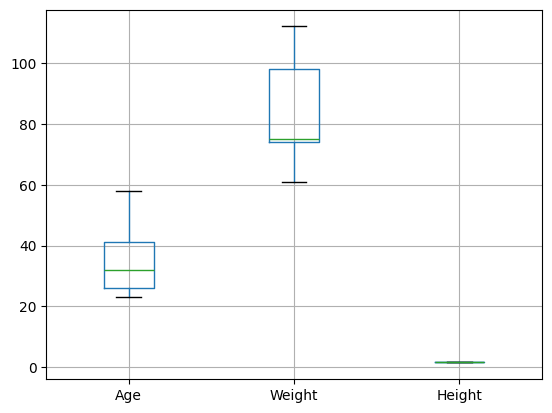

In [26]:
# Visualiza los datos numéricos del dataset df en un único boxplot
boxplot_dataset(df,together=True)

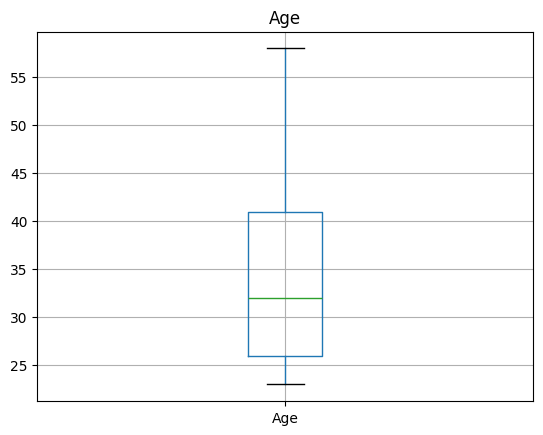

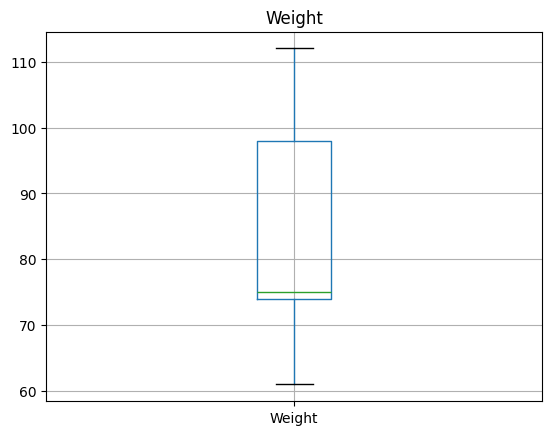

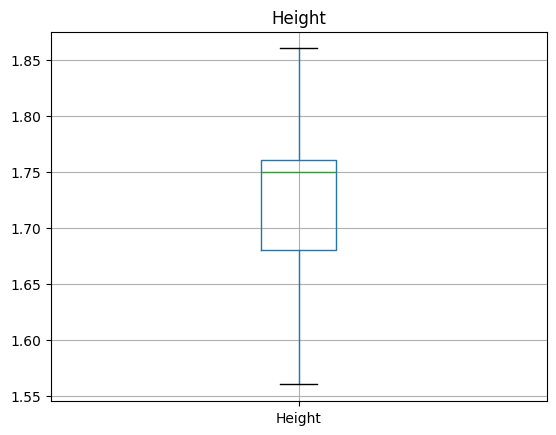

In [27]:
# Visualiza los datos numéricos del dataset df en distintos boxplot (hay que darle al <Enter> para que salga otro)
boxplot_dataset(df,together=False)

#### pieplot

El funcionamiento de la función ***pieplot*** es muy parecido al anterior. En este caso, dibuja un gráfico de tipo "pie" o "tarta". Es muy conveniente para visualizar las variables categóricas, ya que se permite ver la frecuencia de cada valor posible. Este método no admite ver los datos en un mismo gráfico. En vez de eso, cada variable se visualiza por separado. Además, como es de costumbre, ofrece la oportunidad de considerar las variables numéricas como si fueran categóricas gracias al parámetro *only_categorical*.

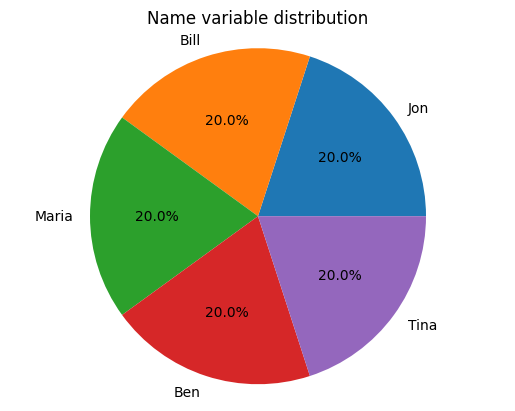

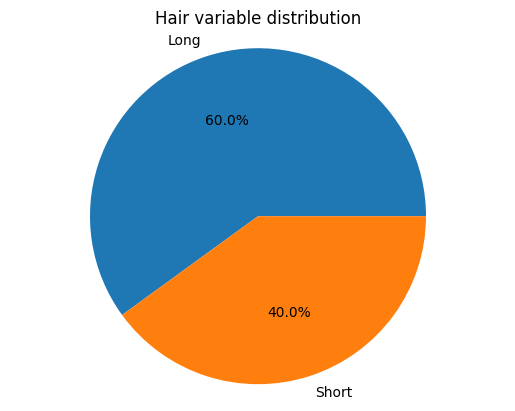

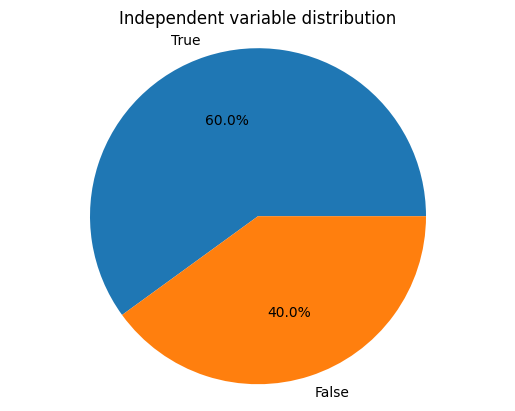

In [28]:
# Visualiza sólo los datos categóricos del dataset df (hay que presionar <Enter> para cada uno)
pieplot(df,only_categorical=True)

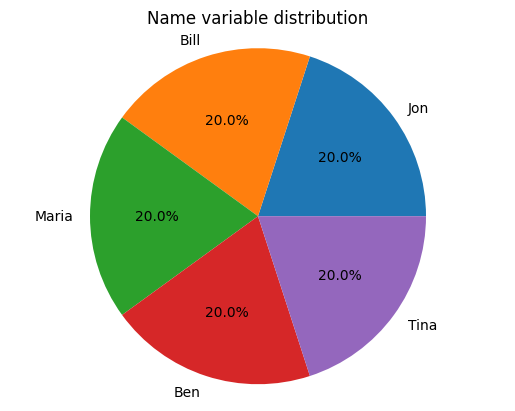

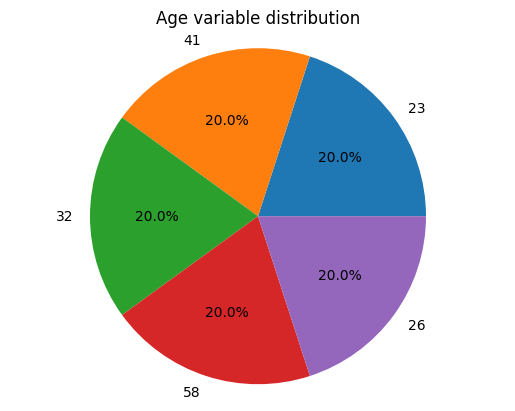

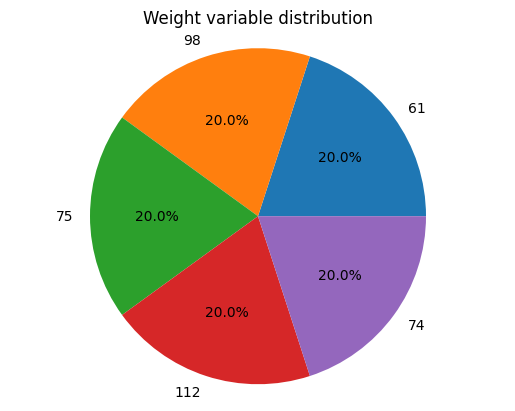

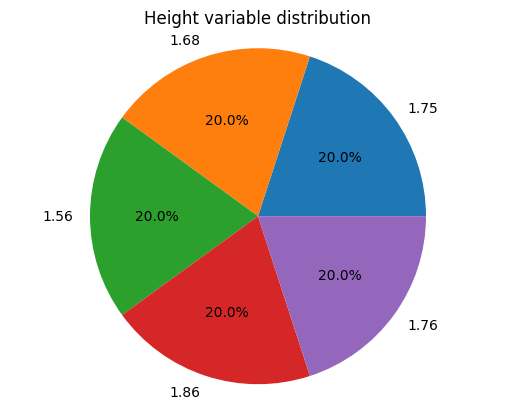

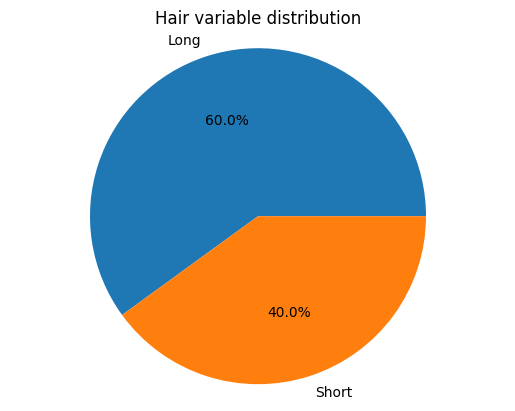

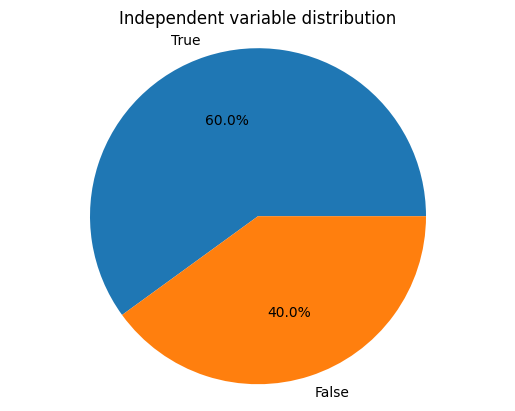

In [29]:
# Visualiza todas las variables del dataset df en pieplots (hay que presionar <Enter> para cada uno)
pieplot(df,only_categorical=False)

### Lectura y escritura de datasets (readwritedf.py)

Además de las funciones ya comentadas, la librería **gestdata** proporciona métodos que sirven tanto para guardar dataframes en ficheros de distinto formato, como para leer y cargar datasets de ellos. De hecho, la librería define un formato propio que se puede utilizar para manejar los datasets en ficheros. Estas funciones están definidas en el fichero "readwritedf.py".

#### Lectura y escritura en ficheros CSV

El formato estándar que utiliza la librería para guardar y leer datos es CSV (.csv). Proporciona una función distinta para cada tarea: ***dataframe2csv*** para la escritura de un *pd.DataFrame* a un fichero .csv, y ***csv2dataframe*** para la lectura. A continuación se muestran unos ejemplos de ejecución:

In [30]:
import os

print("pd.DataFrame original:\n", df)
print()

# Escribimos el dataframe al fichero llamado "prueba.csv"
dataframe2csv(df,file_path="prueba.csv")

# Veamos en que formato lo ha escrito
print("Contenido del fichero 'prueba.csv':\n")
with open("prueba.csv", "r", newline="") as f:
    for line in f.readlines():
        print(line[:-1])

print()
print("DataFrame reconstruido con la lectura del fichero:\n")
# Recuperamos el dataframe leyendo el fichero llamado "prueba.csv"
print(csv2dataframe(file_path="prueba.csv"))

os.remove("prueba.csv")
    

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Contenido del fichero 'prueba.csv':

,Name,Age,Weight,Height,Hair,Independent
0,Jon,23,61,1.75,Long,True
1,Bill,41,98,1.68,Short,False
2,Maria,32,75,1.56,Long,True
3,Ben,58,112,1.86,Short,True
4,Tina,26,74,1.76,Long,False

DataFrame reconstruido con la lectura del fichero:

    Name Age Weight Height   Hair Independent
0    Jon  23     61   1.75   Long        True
1   Bill  41     98   1.68  Short       False
2  Maria  32     75   1.56   Long        True
3    Ben  58    112   1.86  Short        True
4   Tina  26     74   1.76   Long       False


In [31]:
# Algunos ejemplos de mal uso:

# Que ocurre si le pasamos una entrada de otro tipo?
try:
    dataframe2csv(a,file_path="prueba.csv")
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pedimos que lo escriba en un fichero que no sea .csv?
try:
    dataframe2csv(a,file_path="prueba.txt")
except Exception as e:
    print("\nError:")
    print(e)



Error:
Sólo se admiten pd.DataFrames para guardar

Error:
El fichero no es de tipo .csv


#### Lectura y escritura en ficheros en formato propio

Además del formato CSV, el paquete **gestdata** trae un formato propio para la escritura y lectura de los dataset. Igual que en el caso anterior, ofrece 2 funciones para este formato; uno para cada tarea: ***write_dataframe*** para la escritura de un *pd.DataFrame* a un fichero, y ***read_dataframe*** para la lectura. Además, ofrecen la opción de darle un nombre al dataset. Esto se hace usando una lista de 2 elementos como parámetro. A continuación se proveen unos ejemplos. Si se quiere saber el formato concreto que utiliza para guardar los dataset, está especificado en la documentación de la función ***write_dataframe***.

In [32]:
import os

print("pd.DataFrame original:\n", df)
print()

# Escribimos el dataframe al fichero llamado "prueba.txt"
write_dataframe(df,file_path="prueba.txt")

# Veamos en que formato lo ha escrito
print("Contenido del fichero 'prueba.txt':\n")
with open("prueba.txt", "r") as f:
    for line in f.readlines():
        print(line[:-1] if line[-1]=="\n" else line)

print()
print("DataFrame reconstruido con la lectura del fichero:\n")
# Recuperamos el dataframe leyendo el fichero llamado "prueba.txt"
print(read_dataframe(file_path="prueba.txt"))

os.remove("prueba.txt")
    

pd.DataFrame original:
     Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
4   Tina   26      74    1.76   Long        False

Contenido del fichero 'prueba.txt':

5,6
#Rownames: 0,1,2,3,4
#Colnames: Name,Age,Weight,Height,Hair,Independent
Jon,Bill,Maria,Ben,Tina
23,41,32,58,26
61,98,75,112,74
1.75,1.68,1.56,1.86,1.76
Long,Short,Long,Short,Long
True,False,True,True,False

DataFrame reconstruido con la lectura del fichero:

    Name Age Weight Height   Hair Independent
0    Jon  23     61   1.75   Long        True
1   Bill  41     98   1.68  Short       False
2  Maria  32     75   1.56   Long        True
3    Ben  58    112   1.86  Short        True
4   Tina  26     74   1.76   Long       False


In [33]:
# Ahora hacemos unas ejecuciones poniendole un nombre al dataset
import os

# Escribimos el dataframe y el nombre 'ElDataset' al fichero llamado "prueba.txt"
write_dataframe(["ElDataset",df],file_path="prueba.txt")

# Veamos en que formato lo ha escrito
print("Contenido del fichero 'prueba.txt':\n")
with open("prueba.txt", "r") as f:
    for line in f.readlines():
        print(line[:-1] if line[-1]=="\n" else line)

print()
print("DataFrame y su nombre reconstruidos con la lectura del fichero:\n")
# Recuperamos el nombre y el dataframe leyendo el fichero llamado "prueba.txt"
print(read_dataframe(file_path="prueba.txt"))

os.remove("prueba.txt")

Contenido del fichero 'prueba.txt':

5,6,ElDataset
#Rownames: 0,1,2,3,4
#Colnames: Name,Age,Weight,Height,Hair,Independent
Jon,Bill,Maria,Ben,Tina
23,41,32,58,26
61,98,75,112,74
1.75,1.68,1.56,1.86,1.76
Long,Short,Long,Short,Long
True,False,True,True,False

DataFrame y su nombre reconstruidos con la lectura del fichero:

['ElDataset',     Name Age Weight Height   Hair Independent
0    Jon  23     61   1.75   Long        True
1   Bill  41     98   1.68  Short       False
2  Maria  32     75   1.56   Long        True
3    Ben  58    112   1.86  Short        True
4   Tina  26     74   1.76   Long       False]


In [34]:
# Algunos ejemplos de mal uso:

# Que ocurre si le pasamos una entrada de otro tipo?
try:
    write_dataframe(["ElDataset",a],file_path="prueba.txt")
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pasamos una entrada de otro tipo?
try:
    write_dataframe("hola",file_path="prueba.txt")
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pasamos la entrada en otro orden?
try:
    write_dataframe([df,"ElDataset"],file_path="prueba.txt")
except Exception as e:
    print("\nError:")
    print(e)

# Que ocurre si le pasamos un dataframe vacío?
try:
    write_dataframe(pd.DataFrame(),file_path="prueba.txt")
except Exception as e:
    print("\nError:")
    print(e)


Error:
Sólo se admiten pd.DataFrames para guardar

Error:
Sólo se admiten pd.DataFrames para guardar

Error:
El primer elemento de la lista debe ser un string

Error:
Alguna dimensión de x es 0


### Clase Dataset (dataset.py)

El paquete **gestdata** no ofrece únicamente funciones, si no que también implementa una clase personalizada para el manejo de un dataset. Esta clase se llama ***Dataset***, y se encuentra en el fichero *dataset.py*. En cuanto a la estructuración y el acceso a los datos, es parecido a un *pd.DataFrame*. Esta clase implementa varias funciones que sirven para añadir, quitar e indexar datos. A continuación se muestra el funcionamiento de esta clase:

In [35]:
# Creamos un objeto de tipo Dataset
dataset = Dataset()

# Al principio está vacío, sin ningún dato
print(dataset)

Dataset of shape: [0, 0]
Data by columns:


Añadimos una fila de datos con la función ***add_row***. El parámetro tiene que ser una *Python list*.

In [36]:
dataset.add_row(["Jon",23,61])
print(dataset)

Dataset of shape: [1, 3]
Data by columns:
 V0 = Jon , dtype =  str
 V1 = 23 , dtype =  int
 V2 = 61 , dtype =  int


***add_row*** ha hecho que las dimensiones del *Dataset* sean (1,3), ya que hemos añadido una fila de 3 valores. Por tanto, se han creado 3 columnas, y la clase *Dataset* les ha dado un nombre por defecto: V1,V2 y V3. Además, nos dice de que tipo son los valores de cada columna. Estos tipos hay que respetarlos, ya que la clase *Dataset* tiene la restricción de que todos los valores de una columna tienen que tener el mismo tipo.

En vez de ir añadiendo filas uno por uno, podemos utilizar la función ***add_rows*** para añadir cualquier número de filas a la vez. Por tanto, el parámetro esta vez tendrá que ser una lista de filas (lista de listas).

In [37]:
dataset.add_rows([["Bill",41,98],["Maria",32,75],["Ben",58,112]])
print(dataset)

Dataset of shape: [4, 3]
Data by columns:
 V0 = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [23 41 32 58] , dtype =  int
 V2 = [ 61  98  75 112] , dtype =  int


Pero si no respetamos el tipo que se le ha establecido a cada columna, nos dará un error personalizado:

In [38]:
try:
    dataset.add_row([10,"Jose",5])
except Exception as e:
    print("\nError:")
    print(e)


Error:
El valor para la columna V0 tiene que ser de tipo str


Igual que se pueden agregar filas, ofrece la posibilidad de añadir columnas mediante 2 funciones: ***add_col*** y ***add_cols***. Hay que tener en cuenta que todos los valores de la columna tienen que tener el mismo tipo, y la columna tiene que tener la misma longitud que las que ya están en el *Dataset*. Aparte de eso, los métodos aceptan un parámetro extra para definir los nombres que recibirán las columnas.

In [39]:
dataset.add_col([1.75,1.68,1.56,1.86], name="Height")
print(dataset)

Dataset of shape: [4, 4]
Data by columns:
 V0 = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [23 41 32 58] , dtype =  int
 V2 = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float


In [40]:
dataset.add_cols([["Long","Short","Long","Short"],[True,False,True,True]], names=["Hair","Independent"])
print(dataset)

Dataset of shape: [4, 6]
Data by columns:
 V0 = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [23 41 32 58] , dtype =  int
 V2 = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool


Veamos algunos ejemplos de errores personalizados:

In [41]:
try:
    dataset.add_col([10,"Jose",25,24])
except Exception as e:
    print("\nError:")
    print(e)

try:
    dataset.add_col([10,1,3])
except Exception as e:
    print("\nError:")
    print(e)

try:
    dataset.add_col("hola")
except Exception as e:
    print("\nError:")
    print(e)

try:
    dataset.add_col([Dataset(),Dataset(),Dataset(),Dataset()])
except Exception as e:
    print("\nError:")
    print(e)


Error:
Todos los valores de data tienen que ser del mismo tipo

Error:
La columna tiene que tener 4 valores

Error:
El parámetro data tiene que ser una Python list

Error:
Sólo se admiten valores de tipo: [<class 'int'>, <class 'float'>, <class 'bool'>, <class 'str'>]


El último error es más especial, ya que, como indica, la clase *Dataset* solo admite 4 tipos de valores entre sus datos: *integer*, *float*, *boolean* y *string*. Si se intenta agregar un valor de un tipo que no se encuentre en esa lista, no será admitido.

Hasta ahora sólo hemos estado añadiendo filas y columnas. Por tanto, es necesario que haya funciones para quitar datos del *Dataset*. Esto se hace mediante las funciones ***remove_row***, ***remove_rows***, ***remove_col*** y ***remove_cols***. Los nombres son suficientemente explicativos. En esta ocasión, las funciones necesitan recibir índices (*integer*) para saber que fila(s) o columna(s) hay que quitar. En el caso de las columnas, también se admiten índices de tipo *string* que correspondan con los nombres de las variables. Abajo se muestran unos ejemplos de uso:

In [42]:
# Copiamos el dataset que hemos construido para no perder los datos
import copy

dataset2 = copy.deepcopy(dataset)

print("Datos originales:\n")
print(dataset2)

Datos originales:

Dataset of shape: [4, 6]
Data by columns:
 V0 = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [23 41 32 58] , dtype =  int
 V2 = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool


In [43]:
# Quitamos la primera fila
dataset2.remove_row(0)
print(dataset2)

Dataset of shape: [3, 6]
Data by columns:
 V0 = ['Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [41 32 58] , dtype =  int
 V2 = [ 98  75 112] , dtype =  int
 Height = [1.68 1.56 1.86] , dtype =  float
 Hair = ['Short' 'Long' 'Short'] , dtype =  str
 Independent = [False  True  True] , dtype =  bool


In [44]:
# Quitamos las 2 últimas filas
dataset2.remove_rows([-1,-2])
print(dataset2)

Dataset of shape: [1, 6]
Data by columns:
 V0 = ['Bill'] , dtype =  str
 V1 = [41] , dtype =  int
 V2 = [98] , dtype =  int
 Height = [1.68] , dtype =  float
 Hair = ['Short'] , dtype =  str
 Independent = [False] , dtype =  bool


In [45]:
# Quitamos la segunda columna utilizando el índice
dataset2.remove_col(1)
print(dataset2)

Dataset of shape: [1, 5]
Data by columns:
 V0 = ['Bill'] , dtype =  str
 V2 = [98] , dtype =  int
 Height = [1.68] , dtype =  float
 Hair = ['Short'] , dtype =  str
 Independent = [False] , dtype =  bool


In [46]:
# Quitamos varias columnas utilizando los nombres e índices
dataset2.remove_cols(["V0",2,"Independent"])
print(dataset2)

Dataset of shape: [1, 2]
Data by columns:
 V2 = [98] , dtype =  int
 Hair = ['Short'] , dtype =  str


Además, la clase tiene implementada la función \_\_len\_\_, lo que permite llamar a len() y conseguir el número de variables que tiene el objeto *Dataset*.

In [47]:
print(len(dataset))
print(len(dataset2))

6
2


Si eso fuera poco, podemos nombrar las columnas del dataset a nuestro antojo. Esto se puede hacer gracias a la función ***rename_cols***. Este recibe una lista con los nuevos nombres de todas las columnas.

In [48]:
print("Datos originales:\n")
print(dataset)
print()

# Cambiamos los nombres de las columnas:
dataset.rename_cols(["Name","Age","Weight"] + dataset.colnames[3:])

print("Datos con los nombres cambiados:\n")
print(dataset)


Datos originales:

Dataset of shape: [4, 6]
Data by columns:
 V0 = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 V1 = [23 41 32 58] , dtype =  int
 V2 = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool

Datos con los nombres cambiados:

Dataset of shape: [4, 6]
Data by columns:
 Name = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 Age = [23 41 32 58] , dtype =  int
 Weight = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool


Para ir acabando, se quiere mostrar la indexación de un objeto de tipo *Dataset*. Debido a que la clase tiene implementada el método \_\_get\_\_, los objetos de tipo *Dataset* se pueden indexar mediante corchetes *[ ]*. Además, admite hasta 2 valores dentro de los corchetes: el primero sirve para indexar las columnas y el segundo para las filas. De hecho, el primer índice puede ser un *string* o un *integer*. Las indexaciones por nombre se hacen en tiempo O(1) gracias al uso de un diccionario interno.

In [49]:
print("Datos originales:\n")
print(dataset)
print()

print("1: Indexamos la segunda columna (Age) mediante un índice numérico")
print(dataset[1])
print()

print("2: Indexamos la segunda columna (Age) mediante el nombre")
print(dataset["Age"])
print()

print("3: Indexamos el último elemento de la primera columna:")
print(dataset[0,-1])
print()


Datos originales:

Dataset of shape: [4, 6]
Data by columns:
 Name = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 Age = [23 41 32 58] , dtype =  int
 Weight = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool

1: Indexamos la segunda columna (Age) mediante un índice numérico
[23, 41, 32, 58]

2: Indexamos la segunda columna (Age) mediante el nombre
[23, 41, 32, 58]

3: Indexamos el último elemento de la primera columna:
Ben



Si eso fuera poco, la clase *Dataset* admite la indexación vía *slicing*. Esto permite acceder a varias columnas o filas a la vez de una manera más compleja. De hecho, si el output es multidimensional, devolverá otro objeto de tipo *Dataset* con los datos solicitados:

In [50]:
print("4: Indexamos las 2 filas del medio y todas las columnas:")
print(dataset[:,1:3])
print()

print("5: Indexamos las columnas de índice par:")
print(dataset[::2])
print()

print("6: Indexamos las 2 últimas filas de la columna 'Independent':", dataset["Independent",-2:0])
print()

print("7: Creamos una copia del Dataset indexando todos los elementos:")
print(dataset[:,:])
print()



4: Indexamos las 2 filas del medio y todas las columnas:
Dataset of shape: [2, 6]
Data by columns:
 Name = ['Bill' 'Maria'] , dtype =  str
 Age = [41 32] , dtype =  int
 Weight = [98 75] , dtype =  int
 Height = [1.68 1.56] , dtype =  float
 Hair = ['Short' 'Long'] , dtype =  str
 Independent = [False  True] , dtype =  bool

5: Indexamos las columnas de índice par:
Dataset of shape: [4, 3]
Data by columns:
 Name = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 Weight = [ 61  98  75 112] , dtype =  int
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str

6: Indexamos las 2 últimas filas de la columna 'Independent': [True, True]

7: Creamos una copia del Dataset indexando todos los elementos:
Dataset of shape: [4, 6]
Data by columns:
 Name = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 Age = [23 41 32 58] , dtype =  int
 Weight = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True 

Para terminar, la clase ofrece 2 funciones para la conversión de objetos tipo *pd.DataFrame*. La primera función, ***from_dataframe***, se puede utilizar para convertir un *pd.DataFrame* a un *Dataset* propio. Debido a que el método está definido dentro de la clase, requiere la instanciación de un *Dataset* antes de poder utilizarlo. Además, se puede utilizar para agregar las variables de un *pd.DataFrame* a un *Dataset* no vacío, siempre que se respeten las restricciones. El segundo método es ***to_dataframe***, el cual devuelve un *pd.DataFrame* con los mismos datos de un objeto *Dataset*. El empleo de estas funciones no tiene mucho misterio:

In [51]:
# Convertimos el Dataset en un pd.DataFrame
print("Dataset convertido a pd.DataFrame:\n")
pd_dataframe = dataset.to_dataframe()
print(pd_dataframe)
print("-------------------------------------------------------")
print()

# Reconvertimos el pd.DataFrame en un Dataset
print("pd.DataFrame reconvertido a Dataset:\n")
converted_dataset = Dataset()
converted_dataset.from_dataframe(pd_dataframe)
print(converted_dataset)

Dataset convertido a pd.DataFrame:

    Name  Age  Weight  Height   Hair  Independent
0    Jon   23      61    1.75   Long         True
1   Bill   41      98    1.68  Short        False
2  Maria   32      75    1.56   Long         True
3    Ben   58     112    1.86  Short         True
-------------------------------------------------------

pd.DataFrame reconvertido a Dataset:

Dataset of shape: [4, 6]
Data by columns:
 Name = ['Jon' 'Bill' 'Maria' 'Ben'] , dtype =  str
 Age = [23 41 32 58] , dtype =  int
 Weight = [ 61  98  75 112] , dtype =  int
 Height = [1.75 1.68 1.56 1.86] , dtype =  float
 Hair = ['Long' 'Short' 'Long' 'Short'] , dtype =  str
 Independent = [ True False  True  True] , dtype =  bool


### Funciones extra

En esta última sección se presentan unas funciones adicionales que se implementan en el paquete **gestdata** y que pueden ser útiles para la gestión de datasets y de datos de Machine Learning. Concretamente, se encuentran en el fichero "extras.py".

#### is_binary

La función ***is_binary*** sirve para saber si un vector contiene datos binarios o no. Los valores binarios se consideran {0,1,False,True}. Por tanto, el output del método será *True* si todos los valores del vector están en ese grupo, y *False* en el caso contrario. Puede ser útil para saber si una variable tiene los datos correctos como para ser una variable objetivo de etiquetas. El funcionamiento es muy simple de entender:

In [52]:
print("Vector a revisar:",a)
output = is_binary(a)
print("Es binario el vector? ", output)

print()
vec = np.array(df["Name"])
print("Vector a revisar:",vec)
output = is_binary(vec)
print("Es binario el vector? ", output)

print()
vec = np.array(["False","True","True"])
print("Vector a revisar:",vec)
output = is_binary(vec)
print("Es binario el vector? ", output)

print()
vec = np.array(df["Independent"])
print("Vector a revisar:",vec)
output = is_binary(vec)
print("Es binario el vector? ", output)

print()
vec = np.array([1,1,1,1,1])
print("Vector a revisar:",vec)
output = is_binary(vec)
print("Es binario el vector? ", output)

print()
vec = np.array([1,0,1,0,0,0,1,0,1,0])
print("Vector a revisar:",vec)
output = is_binary(vec)
print("Es binario el vector? ", output)

Vector a revisar: [3.5 7.4 1.2 2.  3.9 5.3 6.1 6.9]
Es binario el vector?  False

Vector a revisar: ['Jon' 'Bill' 'Maria' 'Ben' 'Tina']
Es binario el vector?  False

Vector a revisar: ['False' 'True' 'True']
Es binario el vector?  False

Vector a revisar: [ True False  True  True False]
Es binario el vector?  True

Vector a revisar: [1 1 1 1 1]
Es binario el vector?  True

Vector a revisar: [1 0 1 0 0 0 1 0 1 0]
Es binario el vector?  True


#### conditional_entropy

El método ***conditional_entropy***, tal como indica su nombre, sirve para calcular la entropía condicional entre 2 vectores. De hecho, sólo necesita 2 parámetros para funcionar: el primer vector (condicionado) y el segundo (condicionante). Como output, devuelve un valor numérico que corresponde a la entropía condicional de entre los vectores de entrada. Sirve tanto para variables numéricas como para categóricas. Abajo se muestran unos ejemplos:

In [53]:
condicionado = df["Age"]
condicionante = df["Independent"]
cond_entrpy = conditional_entropy(condicionado, condicionante)
print("Vector condicionado: ", np.array(condicionado))
print("Vector condicionante: ", np.array(condicionante))
print("Valor de la entropía condicional: ", cond_entrpy)
print("\n")

condicionado = df["Independent"]
condicionante = df["Age"]
cond_entrpy = conditional_entropy(condicionado, condicionante)
print("Vector condicionado: ", np.array(condicionado))
print("Vector condicionante: ", np.array(condicionante))
print("Valor de la entropía condicional: ", cond_entrpy)
print("\n")

condicionado = df["Independent"]
condicionante = df["Hair"]
cond_entrpy = conditional_entropy(condicionado, condicionante)
print("Vector condicionado: ", np.array(condicionado))
print("Vector condicionante: ", np.array(condicionante))
print("Valor de la entropía condicional: ", cond_entrpy)
print("\n")

condicionado = df["Name"]
condicionante = df["Height"]
cond_entrpy = conditional_entropy(condicionado, condicionante)
print("Vector condicionado: ", np.array(condicionado))
print("Vector condicionante: ", np.array(condicionante))
print("Valor de la entropía condicional: ", cond_entrpy)
print("\n")


Vector condicionado:  [23 41 32 58 26]
Vector condicionante:  [ True False  True  True False]
Valor de la entropía condicional:  1.3509775004326936


Vector condicionado:  [ True False  True  True False]
Vector condicionante:  [23 41 32 58 26]
Valor de la entropía condicional:  0.0


Vector condicionado:  [ True False  True  True False]
Vector condicionante:  ['Long' 'Short' 'Long' 'Short' 'Long']
Valor de la entropía condicional:  0.9509775004326937


Vector condicionado:  ['Jon' 'Bill' 'Maria' 'Ben' 'Tina']
Vector condicionante:  [1.75 1.68 1.56 1.86 1.76]
Valor de la entropía condicional:  0.0


